<a href="https://colab.research.google.com/github/jorge123aquino/ejemplo_k_nn/blob/main/Ejemplo_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejemplo K NN I

In [26]:
#cargando bibliotecas
import numpy as np
import matplotlib.pyplot as plt


In [27]:
#Generando conjunto de datos aleatorio
X = np.random.rand(50, 2)
y = np.zeros((50,1))
y[25:] = 1


In [28]:
#Creando función distancia euclidiana
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))


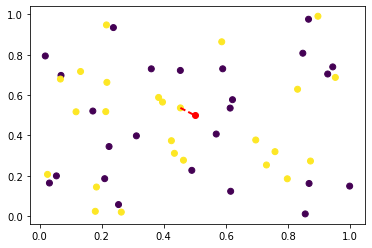

In [34]:
#KNN
def knn(X, query_point, k):
    distances = []
    for i in range(len(X)):
        distance = euclidean_distance(X[i], query_point)
        distances.append((distance, i))
    distances = sorted(distances)
    neighbors = distances[:k]
    return neighbors

# Definimos el objeto para el cual queremos encontrar los vecinos más cercanos
query_point = np.array([0.5, 0.5])

# Encontramos los vecinos más cercanos
neighbors = knn(X, query_point, k=1) #<------- MOVIENDO K = 1, K=2, K=3,... K=n SE PUEDE OBSERVAR EL COMPORTAMIENTO DEL ALGORITMO

# Graficamos los objetos en nuestro conjunto de datos
plt.scatter(X[:, 0], X[:, 1], c=y.flatten())

# Graficamos el objeto para el cual queremos encontrar los vecinos más cercanos
plt.scatter(query_point[0], query_point[1], c='red')

# Graficamos los vecinos más cercanos
for neighbor in neighbors:
    idx = neighbor[1]
    plt.plot([query_point[0], X[idx, 0]], [query_point[1], X[idx, 1]], 'r--', lw=2)

# Mostramos la gráfica
plt.show()


## Ejemplo K NN II

In [14]:
#IMPORTAR BIBLIOTECAS
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


In [15]:
# Creamos un conjunto de datos de ejemplo
X = np.array([[1, 2], [2, 1], [2, 3], [3, 2], [4, 2], [4, 4], [5, 3], [6, 2], [6, 4], [7, 3], [8, 2], [8, 4], [9, 1], [9, 3]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])


In [1]:
#Creando función de distancia euclidiana
def distancia(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))


In [17]:
#KNN
def knn(X_train, y_train, x_test, k):
    distancias = []
    for i in range(len(X_train)):
        dist = distancia(X_train[i], x_test)
        distancias.append((dist, y_train[i]))
    distancias = sorted(distancias)
    k_vecinos = distancias[:k]
    etiquetas_vecinos = [vecino[1] for vecino in k_vecinos]
    contador = Counter(etiquetas_vecinos)
    etiqueta = contador.most_common()[0][0]
    return etiqueta


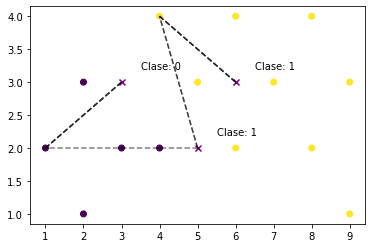

In [18]:
# Graficar el conjunto de datos de ejemplo
plt.scatter(X[:, 0], X[:, 1], c=y)

# Clasificar algunos puntos de prueba y graficarlos
for punto in [[3, 3], [5, 2], [6, 3]]:
    etiqueta = knn(X, y, punto, 3)
    plt.scatter(punto[0], punto[1], c='purple', marker='x')
    plt.annotate(f"Clase: {etiqueta}", xy=(punto[0], punto[1]), xytext=(punto[0]+0.5, punto[1]+0.2))

    # Encontrar los k vecinos más cercanos y graficarlos
    distancias = []
    for i in range(len(X)):
        dist = distancia(X[i], punto)
        distancias.append((dist, y[i]))
    distancias = sorted(distancias)
    k_vecinos = distancias[:3]
    for vecino in k_vecinos:
        plt.plot([punto[0], X[y == vecino[1]][0][0]], [punto[1], X[y == vecino[1]][0][1]], 'k--', alpha=0.5)

plt.show()